In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.linalg import toeplitz

## Time Series Analysis Coursework Q1

In [2]:
# ARMA(1, 1) simulation for given initial conditions
def ARMA11(phi, theta, sigma2, N):
    samples = np.array([])
    D = sigma2 * np.array([[1 + (phi - theta)**2 / (1 - phi**2), 1], [1, 1]])
    C = np.linalg.cholesky(D)  # use cholesky
    y1 = np.random.normal(0, 1)
    y2 = np.random.normal(0, 1)
    x0, eps0 = np.dot(C, np.array([y1, y2])) # initial x_0,eps_0: C*y
    for i in range(N):
        eps1 = np.random.normal(0, np.sqrt(sigma2))
        x1 = phi*x0 + eps1 - theta*eps0
        samples = np.append(samples, x1)
        x0 = x1
        eps0 = eps1
    return samples

In [3]:
# 1b
def acvs(X, tau):
    tau, N = abs(tau), len(X)
    mu = np.sum(X)/N
    return sum([(X[i] - mu)*(X[i+tau] - mu) for i in range(N - tau)]) / N

In [4]:
# 1c
def periodogram(X):
    N = len(X)
    shifted_sum = np.fft.fftshift(np.fft.fft(X, N))
    spec_est = np.abs(shifted_sum)**2 / N
    freqs = -1/2 + np.arange(0,N)/N
    return spec_est, freqs

[111.5623059  91.4376941 180.         91.4376941 111.5623059] [-0.5 -0.3 -0.1  0.1  0.3]


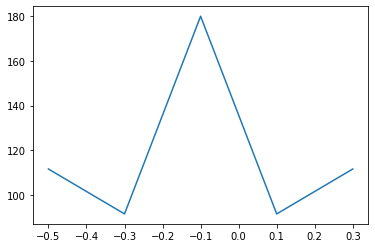

In [5]:
X = np.array([1,2,2,1,24])
s, f = periodogram(X)
print(s, f)
plt.plot(f, s)
plt.show()

## Q2

In [6]:
# A)B)C)

phi, theta, sigma2 = -0.45, 0.90, 2.25
N = np.array([4, 8, 16, 32, 64, 128, 256, 512])  # N for length
N_t = 10000

def seq_generator(lth, N_t):
    S_1 = np.array([])
    S_2 = np.array([])
    for i in range(N_t):
        ts = ARMA11(phi, theta, sigma2, lth)
        spec_est, freqs = periodogram(ts)
        S_1 = np.append(S_1, spec_est[int(lth/4)])
        S_2 = np.append(S_2, spec_est[int(lth/4 + 1)])
    return S_1, S_2

In [7]:
# to compute sdf(1/4):
def sdf(f):
    return sigma2*np.abs(1 - theta*(np.exp(-2j*np.pi*f)))**2 / np.abs(1 - phi*(np.exp(-2j*np.pi*f)))**2

In [8]:
# a) sample mean

# seq to store sample mean
S1_mean = np.array([])

for i in range(len(N)):
    seq1, seq2 = seq_generator(N[i], N_t)
    S1_mean = np.append(S1_mean, np.mean(seq1))
    print(len(S1_mean))

# plotting
plt.plot(N, S1_mean, color='pink')
plt.xlabel("values of N")
plt.ylabel("$E(S_{j}^{p}(1/4)$")
plt.axhline(y = sdf(1/4), c="blue", linewidth=1)
plt.savefig("Q2A")
plt.show()

1
2
3
4
5
6


KeyboardInterrupt: 

1
2
3
4
5
6
7
8


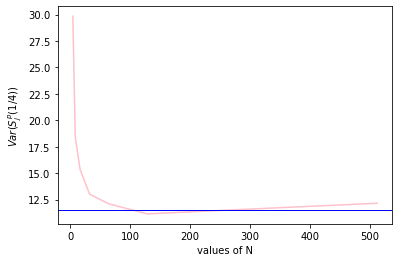

In [142]:
# b) sample var

S1_var = np.array([])

for i in range(len(N)):
    seq1, seq2 = seq_generator(N[i], N_t)
    S1_var = np.append(S1_var, np.var(seq1)*len(seq1)/(len(seq1) - 1))
    print(len(S1_var))
    
# plotting
plt.plot(N, S1_var, color='pink')
plt.xlabel("values of N")
plt.ylabel("$Var(S_j^{p}(1/4))$")
plt.axhline(y = sdf(1/4)**2, c="blue", linewidth=1)
plt.savefig("Q2B")
plt.show()

1
2
3
4
5
6
7
8


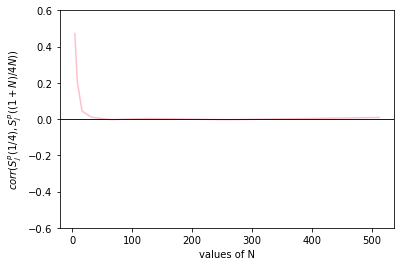

In [175]:
# c) correlation coef

# define a function to compute the correlation coefficient
def P_cor(x, y):
    res = 0
    for j in range(len(x)):
        res += (x[j] - np.mean(x)) * (y[j] - np.mean(y))
    res = res / np.sqrt(len(x)**2 * np.var(x) * np.var(y))
    return res

S_cor = np.array([])

for i in range(len(N)):
    seq1, seq2 = seq_generator(N[i], N_t)
    rho = P_cor(seq1, seq2)
    S_cor = np.append(S_cor, rho)
    print(len(S_cor))
plt.plot(N, S_cor, color='pink')
plt.axhline(y=0, c="blue", linewidth=1)
plt.xlabel("values of N")
plt.ylabel("$corr(S_j^{p}(1/4), S_j^{p}((1+N)/4N))$")
plt.ylim(-0.6, 0.6)
plt.savefig("Q2C")
plt.show()

In [147]:
# asymptotic distribution
from scipy.stats import chi2
x = np.arange(0, 40, 1)

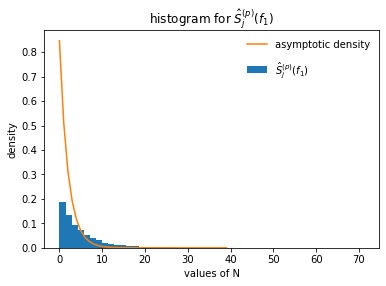

In [148]:
# d)
seq1, seq2 = seq_generator(N[0], N_t)

plt.hist(seq1, density=True, bins=50, label="$\hat{S}_{j}^{(p)}(f_1)$")
plt.plot(x, sdf(1/4)/2*chi2.pdf(x, df=2), label="asymptotic density")
plt.legend(loc='upper right', frameon=False, labelspacing=1)
plt.xlabel("values of N")
plt.ylabel("density")
plt.title("histogram for $\hat{S}_{j}^{(p)}(f_1)$")
plt.savefig("Q2D")
plt.show()

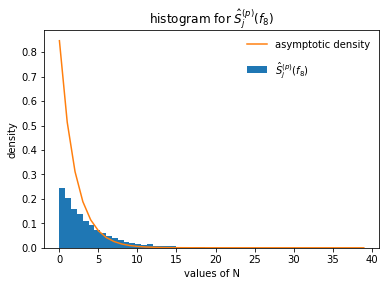

In [149]:
# e)
seq1, seq2 = seq_generator(N[3], N_t)

plt.hist(seq1, density=True, bins=50, label="$\hat{S}_{j}^{(p)}(f_8)$")
plt.plot(x, sdf(1/4)/2*chi2.pdf(x, df=2), label="asymptotic density")
plt.legend(loc='upper right', frameon=False, labelspacing=1)
plt.xlabel("values of N")
plt.ylabel("density")
plt.title("histogram for $\hat{S}_{j}^{(p)}(f_8)$")
plt.savefig("Q2E")
plt.show()

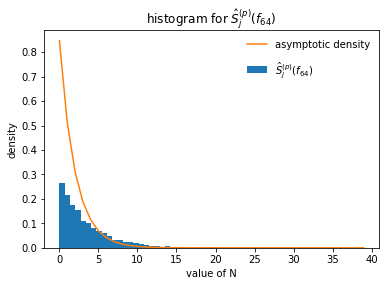

In [150]:
# f)
seq1, seq2 = seq_generator(N[6], N_t)

plt.hist(seq1, density=True, bins=50, label="$\hat{S}_{j}^{(p)}(f_{64})$")
plt.plot(x, sdf(1/4)/2*chi2.pdf(x, df=2), label="asymptotic density")
plt.legend(loc='upper right', frameon=False, labelspacing=1)
plt.xlabel("value of N")
plt.ylabel("density")
plt.title("histogram for $\hat{S}_{j}^{(p)}(f_{64})$")
plt.savefig("Q2F")
plt.show()

## Q3

1293.6361643835617


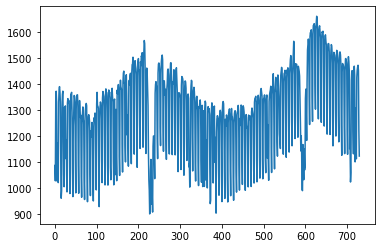

In [117]:
# read and convert the series

import csv
X = np.array([])
with open('time_series.csv','r') as f:
    reader = csv.reader(f)
    for row in reader:
        X = np.append(X, row)
X = np.array(row).astype(np.float64)
N = len(X)
print(np.mean(X))
plt.plot(X)

In [118]:
# center the series
X = X - np.mean(X)

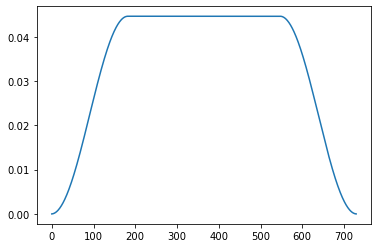

In [119]:
# a)
# 0.5 cosine taper

p = 0.5
h_coef = np.array([])
for i in range(1, N+1):
    if 1<= i <= int(p*N)/2:
        h_coef = np.append(h_coef, (1-np.cos(2*np.pi*i/(int(p*N)+1)))/2)
    elif int(p*N)/2 < i < N + 1-int(p*N)/2:
        h_coef = np.append(h_coef, 1)
    else:
        h_coef = np.append(h_coef, (1-np.cos(2*np.pi*(N+1-i)/(int(p*N)+1)))/2)

C = np.sum(h_coef**2)  # normalizing constants
h_coef = h_coef / np.sqrt(C)

plt.plot(h_coef)
plt.savefig("taper")
plt.show()

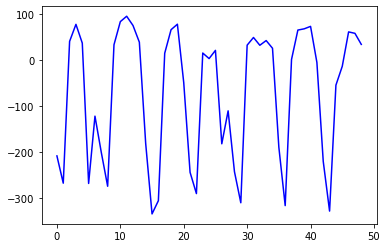

In [120]:
# plotting time series for the fist 49 days
plt.plot(range(0,49), X[0:49], color="blue")
plt.show()

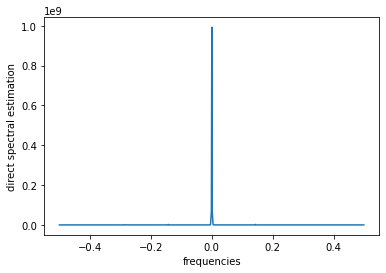

In [121]:
# without centering
XX = np.array(row).astype(np.float64)
estimate, freqs = periodogram(h_coef*XX)

# direct spectral estimation in dB
plt.plot(freqs, (N*estimate))
plt.xlabel("frequencies")
plt.ylabel("direct spectral estimation")
plt.savefig("without centering")
plt.show()

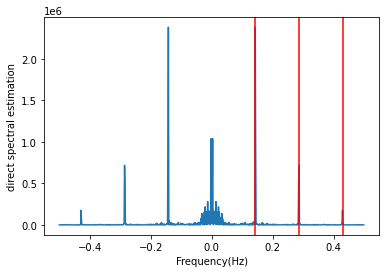

In [122]:
estimate, freqs = periodogram(h_coef*X)
plt.plot(freqs, (N*estimate))

plt.xlabel("Frequency(Hz)")
plt.ylabel("direct spectral estimation")
plt.savefig("DSE of energy consumption")

# trials to match the peaks
plt.axvline(1/7, color="red")
plt.axvline(1/3.5, color="red")
plt.axvline(1/2.3255, color="red")
plt.show()

# from online sources and lecture nots, 1/f represents the period.
# For the peak at 0: these denotes points without periodic trend
# peak at f0, f1, f2: 1/7, 1/3.5, 1/2.33, periodic trends appear every 7days, half a week and 2.32 days

In [123]:
# b) # fit an AR(p) model using ML

# function to obtain desired F matrix:
def fill_F(X, N, p):
    F = np.zeros((N-p, p))
    for i in range(p):
        for j in range(N-p):
            F[j, i] = X[p-i+j-1]
    return F

def ML_est(X, p):
    F = fill_F(X, len(X), p)
    phi_hat = np.linalg.inv(F.T @ F) @ F.T @ X[p: ]
    return phi_hat

In [124]:
# tested

X_test = np.array([1,2,3,4,5,6,7,8])
p = 2
fill_F(X_test, len(X_test), p)

array([[2., 1.],
       [3., 2.],
       [4., 3.],
       [5., 4.],
       [6., 5.],
       [7., 6.]])

In [125]:
# b) fit an AR(p) using YW

def tapr_acvs(X, tau):
    tau = abs(tau)
    s_tau = np.sum([h_coef[i]*h_coef[i+tau]*X[i]*X[i+tau] for i in range(N-tau)])
    return s_tau

def fill_Gamma(X, p):
    v = [tapr_acvs(X, i) for i in range(p)]
    Gamma = toeplitz(v, v)  # using Toeplitz
    return Gamma

def YW_est(X, p):
    gamma = [tapr_acvs(X, i) for i in range(1, p+1)]
    Gamma = fill_Gamma(X, p)
    phi_hat = np.linalg.inv(Gamma)@gamma
    return  phi_hat

In [126]:
p=3
fill_Gamma(h_coef*X, p)

array([[44.86661105, 25.04847724,  5.53828877],
       [25.04847724, 44.86661105, 25.04847724],
       [ 5.53828877, 25.04847724, 44.86661105]])

In [168]:
# c)

h, P, N = 14, 1, len(X)
q = scipy.stats.chi2.ppf(0.95, df=14)  # finding the quantile of chi-sqr
L = q + 1

def LB_test(X, h, q, p, N, L, method):   
    while L > q:
        F = fill_F(X, len(X), p)
        if method == 0:
            phi_hat = ML_est(X, p)
        if method == 1:
            phi_hat = YW_est(X, p)
        res = X[p: ] - F @ phi_hat  # res sequence
        n = len(res)
        L = n*(n+2)*np.sum([(acvs(res, i)/acvs(res, 0))**2/(n-i) for i in range(1, h+1)])
        p += 1
    return p-1, phi_hat, L

## justification: slight difference in res

In [164]:
p = 4
N = len(X)  # centered X
print(X[0:10])

phi = YW_est(X, p)
print(phi)

F = fill_F(X, N, p)
res = X[p: ] - F @ phi
print(res[0:10])

[-207.53616438 -266.73616438   41.06383562   78.06383562   37.36383562
 -267.33616438 -121.23616438 -200.03616438 -273.43616438   33.76383562]
[ 0.78278341 -0.41892036  0.23257285 -0.07749186]
[  39.41246245 -294.10163953   88.70920697 -219.76757046 -102.56894488
  171.48577044  -19.88574766   92.17534869    6.81230393    3.3779613 ]


In [169]:
lp, ml_coeffs, L= LB_test(X, h, q, 1, N, L, method=0)
print(lp, ml_coeffs, L)

22 [ 0.6945035  -0.0237297   0.07616075 -0.07340594  0.09066148  0.10641031
  0.30209049 -0.22002768 -0.07446729  0.06544186  0.03335461 -0.14452815
 -0.02592977  0.24586605 -0.19601457  0.04645478 -0.11404946  0.01332519
  0.0473315  -0.07448256  0.36634425 -0.22213929] 12.395720644037777


In [170]:
lp, yw_coeffs, L = LB_test(X, h, q, 1, N, L, method=1)
print(lp, yw_coeffs, L)

UnboundLocalError: local variable 'phi_hat' referenced before assignment

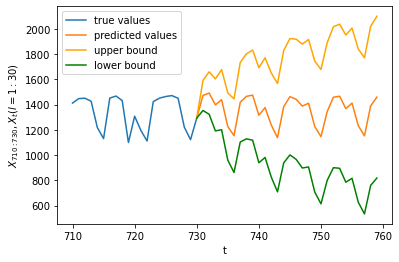

In [102]:
# d)
# reported parameters using ML method
lp, phi = LB_test(X, h, q, p, N, L, method=0)

# uncentered time series
X = np.array(row).astype(np.float64)

# to predict l-step forward data points
for i in range(30):
    xp = np.dot(phi, X[-lp:][::-1])
    X = np.append(X, xp)

# residuals and sigma_e
F = fill_F(X, len(X), lp)
res = X[lp: ] - F @ phi  
sigma_e = np.std(res)

upp_bd = [X[730+i] + 1.96*sigma_e*np.sqrt(i) for i in range(30)]
low_bd = [X[730+i] - 1.96*sigma_e*np.sqrt(i) for i in range(30)]

plt.plot(range(710,731), X[710:731], label="true values")
plt.plot(range(730,760), X[730:761], label="predicted values")
plt.plot(range(730,760), upp_bd, color="orange", label="upper bound")
plt.plot(range(730,760), low_bd, color="green", label="lower bound")
plt.legend()
plt.xlabel("t")
plt.ylabel("$X_{710:730}, X_t(l=1:30)$")
plt.savefig("30-step prediction")
plt.show()